# DNA Replication

## Synchronous and Asynchronous

###### Model
* Lattice model with equal block size in which all block fire from midpoint.
* Fork speed is constant. NT = 3, no. of total particles.
* Model. (n>0 and n<N-1), N = total no. of blocks.
* Pos[Bn](t+1) = Pos[Bn](t) * delta(t +- t’)  +-   mu * dt
*     Par[Bn](t’) = Par[Bn-1](t’ +- pos) + Par[Bn+1](t’ +- pos)
* B > 0 , B < n-1 where n represents block no. Bn in the nth block, t is time 
* Boundary condition for blocks - [pos > 0 and pos <100], Pos is position
* Merging takes place at extremities of block. t’
* Currently ignore end blocks. Block 1 and Block n.


In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Synchronous

In [10]:
#Synchronous case
def sync_replication(DT,T,n):
    #Parameters
    B = np.zeros([n,11]) # 1. Equal block size
    v = 10.0 # 3. Constant fork speed
    c = [0,n*100] # 4. Boundary conditions
    # oris between 2nd and n-1 blocks
    #a_oris = [0,1,2] # 5. All blocks active
    a_oris = list(np.arange(n))
    #a_pos = [30,150,270] # Randomly activated block pos
    #a_pos = [30,120,270,330,450,590,610,730,880,990]
    #a_pos = [50,150,250,350,450,550,650,750,850,950]
    a_pos = np.zeros(n)
    for i in range(n):
        pos = np.random.choice(np.arange(0,100,10))
        a_pos[i] = pos+i*100
    print('Ori_positions',a_pos)
    pos = np.zeros([n,2]) # for left and right rf
    par = np.zeros([n,2]) # For particle and its half parts
    Pt = np.zeros(n)
    delta = np.ones([n,2])
    
    RF_pos_l = {}
    RF_pos_r = {}
    
    #dt = 0.1 # time steps
    dt = DT # Delta time step
    t = 0 # Initial time 
    Time = T
    Y = 1.0 # Gamma variable
    mu = v/Y # factor
    NF = 0
    def position(t,td):
        global NF
        if(t>0): # Boundary condition
            for ori in a_oris:
                if(ori>0 and ori<n-1):
                    if(pos[ori][0]>ori*100):
                        pos[ori][0] = pos[ori][0]*delta[ori][0] - mu*dt
                    if(pos[ori][1]<(ori+1)*100):
                        pos[ori][1] = pos[ori][1]*delta[ori][1] + mu*dt
                    if(pos[ori][0]<=ori*100):
                        pos[ori][0] = pos[ori][0]
                        par[ori][0] = 0
                    if(pos[ori][1]>=(ori+1)*100):
                        pos[ori][1] = pos[ori][1]
                        par[ori][1] = 0

                #Terminal cases
                if(ori==0 or ori==n-1):
                    if(ori==0):
                        #Ori 0 on left side
                        if(pos[ori][0]<= ori*100):
                            pos[ori][0] = pos[ori][0]
                            par[ori][0] = 0
                        #Next adjacent RF condition
                        if(pos[ori][1]>=(ori+1)*100):
                            pos[ori][1] = pos[ori][1] 
                        if(pos[ori][0]>0) :
                            pos[ori][0] = pos[ori][0]*delta[ori][0] - mu*dt
                        if (pos[ori][1]<100):
                            pos[ori][1] = pos[ori][1]*delta[ori][1] + mu*dt
                    if(ori==n-1):
                        if(pos[ori][0]<= ori*100):
                            pos[ori][0] = pos[ori][0]
                            par[ori][0] = 0
                        if(pos[ori][1]>= (ori+1)*100):
                            pos[ori][1] = pos[ori][1]
                            par[ori][1] = 0
                        if(pos[ori][0]>ori*100):
                            pos[ori][0] = pos[ori][0]*delta[ori][0] - mu*dt
                        if (pos[ori][1]<(ori+1)*100):
                            pos[ori][1] = pos[ori][1]*delta[ori][1] + mu*dt
                
                #Update RF positions
                RF_pos_l[ori].append(pos[ori][0])
                RF_pos_r[ori].append(pos[ori][1])
                
                #Check for merging cases
                parti = merging(ori)
        return pos

    def particle(a_pos):
        for x in a_oris:
            par[x] = 1,1

    def merging(ori):
        #Synchronous case
        if(pos[ori][0] <= ori*100):
            par[ori][0] = 0
            delta[ori][0]=0
            #pos[ori][0]=pos[ori][0]
            #print('RL left of Block %d merged '%(ori+1))
        if(pos[ori][1]>=(ori+1)*100):
            par[ori][1] = 0
            delta[ori][1]=0
            #pos[ori][0]=-10
            #print('RL right of Block %d merged '%(ori+1))
        if(len(a_oris)!=0):
            if(pos[ori][0]== ori*100 and pos[ori][1]==(ori+1)*100):
                #print(' Both rf of Block %d merged at time '%(ori+1) ,t)
                za = 9
                #a_oris.remove(ori)
            
        if(ori>0 and ori<n):
            Pt[ori] = Pt[ori-1]
        return par[ori]


    def active_ori(a_pos):
        #a_pos = np.random.choice(np.arange(0,110,10),3)
        for x in a_oris:
            #New oris
            RF_pos_l[x] = []
            RF_pos_r[x] = []
            if(pos[x]==0,0):
                pos[x] = a_pos[x],a_pos[x]
                RF_pos_l[x].append(a_pos[x])
                RF_pos_r[x].append(a_pos[x])
        return 0
    
    def rf_plot():
        for i in range(n):
            plt.plot(RF_pos_l[i],np.arange(len(RF_pos_l[i])),'r')
            plt.plot(RF_pos_r[i],np.arange(len(RF_pos_r[i])),'g')
            plt.scatter(RF_pos_l[i],np.arange(len(RF_pos_l[i])),c='r')
            plt.scatter(RF_pos_r[i],np.arange(len(RF_pos_r[i])),c='g')
        plt.xlabel('RF position',fontsize = 15)
        plt.ylabel('Time steps dt= %0.2f'%DT,fontsize = 15)
        #plt.title('Rule based Implementation',fontsize = 15)
        plt.xticks(np.arange(0,n*100+10,100),fontsize = 15)
        #plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        #plt.show()
            
    
    active_ori(a_pos)
    particle(a_pos)
    while(t<Time):
    #    for ori in a_oris:
        #print('Time step:',t)
        xp = position(t,20)
        #print('RF\n',xp)
        t+=1
    #print('Free particles:',NF)
    rf_plot()

Ori_positions [ 50. 120. 290. 310. 470.]


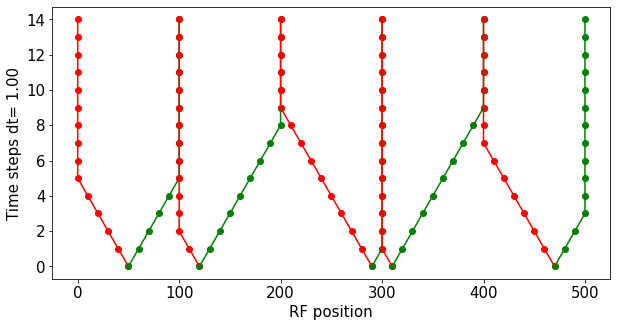

Ori_positions [ 80. 110. 210. 320. 410.]


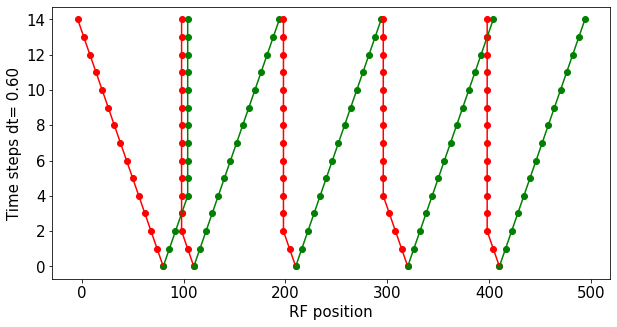

Ori_positions [  0. 160. 270. 390. 460.]


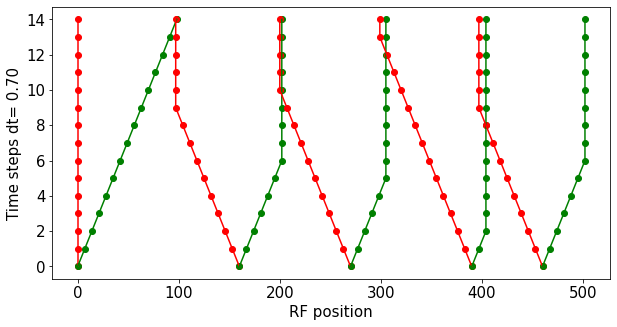

Ori_positions [ 20. 140. 280. 300. 410.]


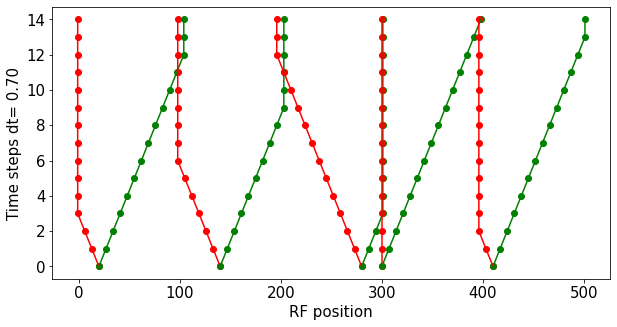

In [3]:
#sync_replication(DT,Time,Blocks)

#plt.suptitle('Asynchronous DNA Replication',fontsize = 15)
for i in range(4):
    plt.figure(figsize=(10,5))   
    #plt.subplot(2,2,i+1)
    dt = np.random.choice(np.arange(0.2,1.1,0.1))
    T = np.random.choice(np.arange(5,20,1))
    T = 15
    sync_replication(dt,T,5)
    plt.show()


## Ori_positions [ 80. 140. 220. 360. 460.]
## Ori_positions [ 60. 180. 250. 380. 460.]
## Ori_positions [ 50. 120. 290. 320. 410.]
## Ori_positions [ 10. 170. 220. 300. 460.]

## Different time point (dt)

In [11]:
def sync_replication(DT,T,n):
    #Parameters
    B = np.zeros([n,11]) # 1. Equal block size
    v = 10.0 # 3. Constant fork speed
    c = [0,n*100] # 4. Boundary conditions
    # oris between 2nd and n-1 blocks
    #a_oris = [0,1,2] # 5. All blocks active
    a_oris = list(np.arange(n))
    #a_pos = [30,150,270] # Randomly activated block pos
    #a_pos = [30,120,270,330,450,590,610,730,880,990]
    #a_pos = [50,150,250,350,450,550,650,750,850,950]
    a_pos = np.zeros(n)
    ori_ori = np.zeros(n-1)
    for i in range(n):
        #Random assignment of ori within block.
        pos = np.random.choice(np.arange(0,100,10))
        a_pos[i] = pos+i*100
    for i in range(n-1):
        ori_ori[i] = a_pos[i+1]-a_pos[i]
    print('Ori_positions',a_pos)
    #print('Ori-Ori',ori_ori)

    pos = np.zeros([n,2]) # for left and right rf
    par = np.zeros([n,2]) # For particle and its half parts
    Pt = np.zeros(n)
    delta = np.ones([n,2])
    
    RF_pos_l = {}
    RF_pos_r = {}
    
    #dt = 0.1 # time steps
    dt = DT # Delta time step
    t = 0 # Initial time 
    Time = T
    Y = 1.0 # Gamma variable
    mu = v/Y # factor
    NF = 0
    def position(t,td):
        global NF
        if(t>0): # Boundary condition
            for ori in a_oris:
                if(ori>0 and ori<n-1):
                    if(pos[ori][0]>pos[ori-1][1]):
                        pos[ori][0] = pos[ori][0]*delta[ori][0] - mu*dt
                    if(pos[ori][1]<pos[ori+1][0]):
                        pos[ori][1] = pos[ori][1]*delta[ori][1] + mu*dt
                    #Merging with left adjacent Case
                    if(np.abs(pos[ori][0]-pos[ori-1][1])<=0):
                        pos[ori][0] = pos[ori][0]
                        par[ori][0] = 0
                    #Merging with right adjacent Case
                    if(np.abs(pos[ori+1][0]-pos[ori][1])<=0):
                        pos[ori][1] = pos[ori][1]
                        par[ori][1] = 0

                #Terminal cases
                if(ori==0 or ori==n-1):
                    if(ori==0):
                        #Ori 0 on left side
                        if(pos[ori][0]<= 0):
                            pos[ori][0] = pos[ori][0]
                            par[ori][0] = 0
                        #Next adjacent RF condition
                        if(pos[ori][0]>0) :
                            pos[ori][0] = pos[ori][0]*delta[ori][0] - mu*dt
                        if (pos[ori][1]<pos[ori+1][0]):
                            pos[ori][1] = pos[ori][1]*delta[ori][1] + mu*dt
                        # Find adjacent fired origin, in this case ori 2 is adj for simplicity.
                        #if(pos[ori+1][0] - pos[ori][1]>0):
                        #    pos[ori][1] = pos[ori][1]*delta[ori][1] + mu*dt
                        
#                         if(np.abs(pos[ori+1][0] - pos[ori][1])<=0):
#                             print('0 Merged to 1')
                        
                            
                    if(ori==n-1):
                        #Ori n on right side
                        if(pos[ori][1]>= (ori+1)*100):
                            pos[ori][1] = pos[ori][1]
                            par[ori][1] = 0
                        if(pos[ori][1]<(ori+1)*100):
                            pos[ori][1] = pos[ori][1]*delta[ori][1] + mu*dt
                        if(pos[ori][0]>pos[ori-1][1]):
                            pos[ori][0] = pos[ori][0]*delta[ori][0] - mu*dt
                        
#                         if(np.abs(pos[ori][0] - pos[ori-1][1])<=0):
#                             print('3 merged to 2')
                
                #Update RF positions
                RF_pos_l[ori].append(pos[ori][0])
                RF_pos_r[ori].append(pos[ori][1])
                
                #Check for merging cases
                parti = merging(ori)
        return pos

    def particle(a_pos):
        for x in a_oris:
            par[x] = 1,1

    def merging(ori):
        #Synchronous case
        if(pos[ori][0] <= ori*100):
            par[ori][0] = 0
            #delta[ori][0]=0
            #pos[ori][0]=pos[ori][0]
            #print('RL left of Block %d merged '%(ori+1))
        if(pos[ori][1]>=(ori+1)*100):
            par[ori][1] = 0
            #delta[ori][1]=0
            #pos[ori][0]=-10
            #print('RL right of Block %d merged '%(ori+1))
        if(len(a_oris)!=0):
            if(pos[ori][0]== ori*100 and pos[ori][1]==(ori+1)*100):
                #print(' Both rf of Block %d merged at time '%(ori+1) ,t)
                za = 9
                #a_oris.remove(ori)
            
        if(ori>0 and ori<n):
            Pt[ori] = Pt[ori-1]
        return par[ori]


    def active_ori(a_pos):
        #a_pos = np.random.choice(np.arange(0,110,10),3)
        for x in a_oris:
            #New oris
            RF_pos_l[x] = []
            RF_pos_r[x] = []
            if(pos[x]==0,0):
                pos[x] = a_pos[x],a_pos[x]
                RF_pos_l[x].append(a_pos[x])
                RF_pos_r[x].append(a_pos[x])
        return 0
    
    def rf_plot():
        #plt.figure(figsize=(10,10))
        for i in range(n):
            plt.plot(RF_pos_l[i],np.arange(len(RF_pos_l[i])),'r')
            plt.plot(RF_pos_r[i],np.arange(len(RF_pos_r[i])),'g')
            plt.scatter(RF_pos_l[i],np.arange(len(RF_pos_l[i])),c='r')
            plt.scatter(RF_pos_r[i],np.arange(len(RF_pos_r[i])),c='g')
        plt.xlabel('RF position',fontsize = 15)
        plt.ylabel('Time steps dt= %0.2f'%DT,fontsize = 15)
        #plt.title('Rule based Implementation',fontsize = 15)
        plt.xticks(np.arange(0,n*100+10,200),fontsize = 15)
        plt.yticks(np.arange(0,Time,2),fontsize = 15)
        #plt.show()
            
    
    active_ori(a_pos)
    particle(a_pos)
    while(t<Time):
    #    for ori in a_oris:
        #print('\nTime step:',t)
        xp = position(t,20)
        #print('RF\n',xp)
        t+=1
    #print('Free particles:',NF)
    rf_plot()

Ori_positions [ 60. 140. 200. 390. 440. 530. 670. 720. 840. 980.]
Ori_positions [ 80. 160. 220. 350. 420. 590. 690. 770. 870. 940.]
Ori_positions [  0. 140. 290. 340. 470. 550. 600. 740. 810. 990.]
Ori_positions [ 10. 170. 200. 380. 490. 560. 600. 710. 890. 920.]


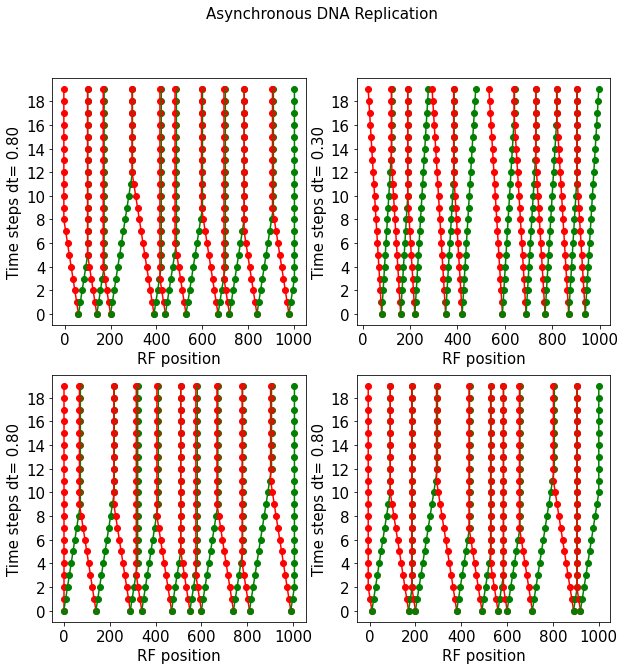

In [23]:
#sync_replication(DT,Time,Blocks)

#sync_replication(0.5,20,5)

T = 20
dt = 1
B = 10    
plt.figure(figsize=(10,10))   
plt.suptitle('Asynchronous DNA Replication',fontsize = 15)
for i in range(4):
    plt.subplot(2,2,i+1)
    dt = np.random.choice(np.arange(0.2,0.9,0.1))
    #T = np.random.choice(np.arange(5,20,1))
    sync_replication(dt,T,B)
plt.show()

## With Particle (factor) dynamics

In [12]:
#With Particles
def sync_replication(DT,T,n):
    #Parameters
    B = np.zeros([n,11]) # 1. Equal block size
    v = 10.0 # 3. Constant fork speed
    c = [0,n*100] # 4. Boundary conditions
    # oris between 2nd and n-1 blocks
    #a_oris = [0,1,2] # 5. All blocks active
    a_oris = list(np.arange(n))
    #a_pos = [30,150,270] # Randomly activated block pos
    #a_pos = [30,120,270,330,450,590,610,730,880,990]
    #a_pos = [50,150,250,350,450,550,650,750,850,950]
    a_pos = np.zeros(n)
    ori_ori = np.zeros(n-1)
    for i in range(n):
        #Random assignment of ori within block.
        pos = np.random.choice(np.arange(0,100,10))
        a_pos[i] = pos+i*100
    for i in range(n-1):
        ori_ori[i] = a_pos[i+1]-a_pos[i]
    print('Ori_positions',a_pos)
    #print('Ori-Ori',ori_ori)

    pos = np.zeros([n,2]) # for left and right rf
    par = np.zeros([n,2]) # For particle and its half parts
    Pt = {}
    delta = np.ones([n,2])
    
    Mt = {}
    
    RF_pos_l = {}
    RF_pos_r = {}
    
    #dt = 0.1 # time steps
    dt = DT # Delta time step
    t = 0 # Initial time 
    Time = T
    Y = 1.0 # Gamma variable
    mu = v/Y # factor
    NF = 0
    FP = 0
    def position(t,td):
        global FP
        if(t>0): # Boundary condition
            for ori in a_oris:
                # Non erminal cases
                if(ori>0 and ori<n-1):
                    if(pos[ori][0]>pos[ori-1][1]):
                        pos[ori][0] = pos[ori][0]*delta[ori][0] - mu*dt
                    if(pos[ori][1]<pos[ori+1][0]):
                        pos[ori][1] = pos[ori][1]*delta[ori][1] + mu*dt
                    #Merging with left adjacent Case
                    if(np.abs(pos[ori][0]-pos[ori-1][1])<=dt*v and par[ori][0]==1):
                        #print('%d merged to %d'%(ori+1,ori))
                        pos[ori][0] = pos[ori][0]
                        par[ori][0] = 0
                        Pt[ori+1] = 1
                        Mt[t] = 1
                    #Merging with right adjacent Case
                    if(np.abs(pos[ori+1][0]-pos[ori][1])<=dt*v and par[ori][1]==1):
                        #print('%d merged to %d'%(ori+1,ori+2))
                        pos[ori][1] = pos[ori][1]
                        par[ori][1] = 0
                        Pt[ori+1] = 1
                        Mt[t] = 1
                #Terminal cases
                if(ori==0 or ori==n-1):
                    if(ori==0):
                        #Ori 0 on left side
                        if(pos[ori][0]<= 0 and par[ori][0]==1):
                            pos[ori][0] = pos[ori][0]
                            par[ori][0] = 0
                            Pt[ori+1] = 1 #'ori: '+str(ori)+'-'+ str(0.5)
                            Mt[t] = 0.5
                            #print('%d merged to Left'%(ori+1))
                        #Next adjacent RF condition
                        if(pos[ori][0]>0) :
                            pos[ori][0] = pos[ori][0]*delta[ori][0] - mu*dt
                        if (pos[ori][1]<pos[ori+1][0]):
                            pos[ori][1] = pos[ori][1]*delta[ori][1] + mu*dt
                        # Find adjacent fired origin, in this case ori 2 is adj for simplicity.
                        #if(pos[ori+1][0] - pos[ori][1]>0):
                        #    pos[ori][1] = pos[ori][1]*delta[ori][1] + mu*dt
                        
                        if(np.abs(pos[ori+1][0] - pos[ori][1])<=dt*v and par[ori][1]==1):
                            #print('%d merged to %d'%(ori+1,ori+2))
                            par[ori][1] = 0
                            par[ori+1][0] = 0
                            Pt[ori+1] = 1 #'ori: '+str(ori)+'-'+ str(0.5) + 'ori: '+str(ori)+'-'+ str(0.5)
                            Mt[t] = 1
                            #Pt[t] = par[]
                        
                            
                    if(ori==n-1):
                        #Ori n on right side
                        if(pos[ori][1]>= (ori+1)*100 and par[ori][1]==1):
                            pos[ori][1] = pos[ori][1]
                            par[ori][1] = 0
                            Pt[ori+1] = 1
                            Mt[t] = 0.5
                            #print('%d merged to Right'%(ori+1))
                        if(pos[ori][1]<(ori+1)*100):
                            pos[ori][1] = pos[ori][1]*delta[ori][1] + mu*dt
                        if(pos[ori][0]>pos[ori-1][1]):
                            pos[ori][0] = pos[ori][0]*delta[ori][0] - mu*dt
                        
                        if(np.abs(pos[ori][0] - pos[ori-1][1])<=dt*v and par[ori][0]==1):
                            #print('%d merged to %d'%(ori+1,ori))
                            par[ori][0] = 0
                            par[ori-1][1] = 0
                            Pt[ori+1] = 1
                            Mt[t] = 1
                            
                
                #Update RF positions
                RF_pos_l[ori].append(pos[ori][0])
                RF_pos_r[ori].append(pos[ori][1])
            #Check particles
            FP = free_par(NF)
            print('Free Particles:',FP)
            print('Particles: ',Pt)
            print('Merge time:',Mt)
                #Check for merging cases
                #parti = merging(ori)
        return pos

    def particle(a_pos):
        for x in a_oris:
            par[x] = 1,1

    def merging(ori):
        #Synchronous case
        if(pos[ori][0] <= ori*100):
            par[ori][0] = 0
            #delta[ori][0]=0
            #pos[ori][0]=pos[ori][0]
            #print('RL left of Block %d merged '%(ori+1))
        if(pos[ori][1]>=(ori+1)*100):
            par[ori][1] = 0
            #delta[ori][1]=0
            #pos[ori][0]=-10
            #print('RL right of Block %d merged '%(ori+1))
            
        if(ori>0 and ori<n):
            Pt[ori] = Pt[ori-1]
        return par[ori]


    def active_ori(a_pos):
        #a_pos = np.random.choice(np.arange(0,110,10),3)
        for x in a_oris:
            #New oris
            RF_pos_l[x] = []
            RF_pos_r[x] = []
            if(pos[x]==0,0):
                pos[x] = a_pos[x],a_pos[x]
                RF_pos_l[x].append(a_pos[x])
                RF_pos_r[x].append(a_pos[x])
        return 0
    
    def rf_plot():
        #plt.figure(figsize=(10,10))
        for i in range(n):
            plt.plot(RF_pos_l[i],np.arange(len(RF_pos_l[i])),'r')
            plt.plot(RF_pos_r[i],np.arange(len(RF_pos_r[i])),'g')
            plt.scatter(RF_pos_l[i],np.arange(len(RF_pos_l[i])),c='r')
            plt.scatter(RF_pos_r[i],np.arange(len(RF_pos_r[i])),c='g')
        plt.xlabel('RF position',fontsize = 15)
        plt.ylabel('Time steps dt= %0.2f'%DT,fontsize = 15)
        #plt.title('Rule based Implementation',fontsize = 15)
        plt.xticks(np.arange(0,n*100+10,100),fontsize = 15)
        plt.yticks(np.arange(0,Time,2),fontsize = 15)
        #plt.show()
            
    def free_par(NF):
        #global NF
        for x in a_oris:
            if(par[x][0]==0):
                NF+=0.5
            if(par[x][1]==0):
                NF+=0.5
            #Pt[x] = Pt
        #merging_time.append(t)
        return NF
        #print(par)
    
    def print_par():
        print(par)
    
    
    active_ori(a_pos)
    particle(a_pos)
    while(t<Time):
    #    for ori in a_oris:
        print('\nTime step:',t)
        xp = position(t,20)
        #print('RF\n',xp)
        t+=1
    #print('Free particles:',NF)
    rf_plot()
    
    #print_par()

Ori_positions [  0. 190. 210. 330. 400.]

Time step: 0

Time step: 1
Free Particles: 0.5
Particles:  {1: 1}
Merge time: {1: 0.5}

Time step: 2
Free Particles: 1.5
Particles:  {1: 1, 2: 1, 3: 1}
Merge time: {1: 0.5, 2: 1}

Time step: 3
Free Particles: 1.5
Particles:  {1: 1, 2: 1, 3: 1}
Merge time: {1: 0.5, 2: 1}

Time step: 4
Free Particles: 1.5
Particles:  {1: 1, 2: 1, 3: 1}
Merge time: {1: 0.5, 2: 1}

Time step: 5
Free Particles: 1.5
Particles:  {1: 1, 2: 1, 3: 1}
Merge time: {1: 0.5, 2: 1}

Time step: 6
Free Particles: 1.5
Particles:  {1: 1, 2: 1, 3: 1}
Merge time: {1: 0.5, 2: 1}

Time step: 7
Free Particles: 2.5
Particles:  {1: 1, 2: 1, 3: 1, 4: 1, 5: 1}
Merge time: {1: 0.5, 2: 1, 7: 1}

Time step: 8
Free Particles: 2.5
Particles:  {1: 1, 2: 1, 3: 1, 4: 1, 5: 1}
Merge time: {1: 0.5, 2: 1, 7: 1}

Time step: 9
Free Particles: 2.5
Particles:  {1: 1, 2: 1, 3: 1, 4: 1, 5: 1}
Merge time: {1: 0.5, 2: 1, 7: 1}

Time step: 10
Free Particles: 2.5
Particles:  {1: 1, 2: 1, 3: 1, 4: 1, 5: 1}
Mer

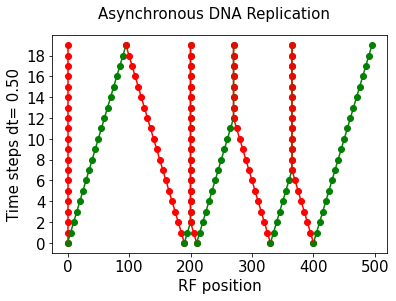

In [5]:
#sync_replication(DT,Time,Blocks)

#sync_replication(0.5,20,5)

T = 20
dt = 0.5
B = 5
#plt.figure(figsize=(10,10))   
plt.suptitle('Asynchronous DNA Replication',fontsize = 15)
for i in range(1):
    #plt.subplot(2,2,i+1)
    #dt = np.random.choice(np.arange(0.2,0.9,0.1))
    #T = np.random.choice(np.arange(5,20,1))
    sync_replication(dt,T,B)
plt.show()


## Asynchronous case

#### Critical cases of mering where no. of nucleotides to be covered by the incoming replication fork are different for each left and right replication fork.

## Variable RF speed cases
##### * A. Vrf_l > Vrf_r or Vrf_l <Vrf_r  (incoming replication forks from left and right towards each other)
##### * B. Stochastic case RF velocity varies at each time steps

### Deterministic

In [6]:
def sync_replication(DT,T,n,VL,VR):
    #Parameters
    B = np.zeros([n,11]) # 1. Equal block size
    vl = VL # 3. Constant fork speed
    vr = VR
    v = 10.0
    c = [0,n*100] # 4. Boundary conditions
    # oris between 2nd and n-1 blocks
    #a_oris = [0,1,2] # 5. All blocks active
    a_oris = list(np.arange(n))
    #a_pos = [30,150,270] # Randomly activated block pos
    #a_pos = [30,120,270,330,450,590,610,730,880,990]
    #a_pos = [50,150,250,350,450,550,650,750,850,950]
    a_pos = np.zeros(n)
    ori_ori = np.zeros(n-1)
    for i in range(n):
        #Random assignment of ori within block.
        pos = np.random.choice(np.arange(0,100,10))
        a_pos[i] = pos+i*100
    for i in range(n-1):
        ori_ori[i] = a_pos[i+1]-a_pos[i]
    print('Ori_positions',a_pos)
    #print('Ori-Ori',ori_ori)

    pos = np.zeros([n,2]) # for left and right rf
    par = np.zeros([n,2]) # For particle and its half parts
    Pt = {}
    delta = np.ones([n,2])
    
    Mt = {}
    
    RF_pos_l = {}
    RF_pos_r = {}
    
    #dt = 0.1 # time steps
    dt = DT # Delta time step
    t = 0 # Initial time 
    Time = T
    Y = 1.0 # Gamma variable
    mu = v/Y # factor
    NF = 0
    FP = 0
    def position(t,td):
        global FP
        if(t>0): # Boundary condition
            for ori in a_oris:
                # Non erminal cases
                if(ori>0 and ori<n-1):
                    if(pos[ori][0]>pos[ori-1][1]):
                        pos[ori][0] = pos[ori][0]*delta[ori][0] - vl*dt
                    if(pos[ori][1]<pos[ori+1][0]):
                        pos[ori][1] = pos[ori][1]*delta[ori][1] + vr*dt
                    #Merging with left adjacent Case
                    if(np.abs(pos[ori][0]-pos[ori-1][1])<=dt*v and par[ori][0]==1):
                        #print('%d merged to %d'%(ori+1,ori))
                        pos[ori][0] = pos[ori][0]
                        par[ori][0] = 0
                        Pt[ori+1] = 1
                        Mt[t] = 1
                    #Merging with right adjacent Case
                    if(np.abs(pos[ori+1][0]-pos[ori][1])<=dt*v and par[ori][1]==1):
                        #print('%d merged to %d'%(ori+1,ori+2))
                        pos[ori][1] = pos[ori][1]
                        par[ori][1] = 0
                        Pt[ori+1] = 1
                        Mt[t] = 1
                #Terminal cases
                if(ori==0 or ori==n-1):
                    if(ori==0):
                        #Ori 0 on left side
                        if(pos[ori][0]<= 0 and par[ori][0]==1):
                            pos[ori][0] = pos[ori][0]
                            par[ori][0] = 0
                            Pt[ori+1] = 1 #'ori: '+str(ori)+'-'+ str(0.5)
                            Mt[t] = 0.5
                            #print('%d merged to Left'%(ori+1))
                        #Next adjacent RF condition
                        if(pos[ori][0]>0) :
                            pos[ori][0] = pos[ori][0]*delta[ori][0] - vl*dt
                        if (pos[ori][1]<pos[ori+1][0]):
                            pos[ori][1] = pos[ori][1]*delta[ori][1] + vr*dt
                        # Find adjacent fired origin, in this case ori 2 is adj for simplicity.
                        #if(pos[ori+1][0] - pos[ori][1]>0):
                        #    pos[ori][1] = pos[ori][1]*delta[ori][1] + mu*dt
                        
                        if(np.abs(pos[ori+1][0] - pos[ori][1])<=dt*v and par[ori][1]==1):
                            #print('%d merged to %d'%(ori+1,ori+2))
                            par[ori][1] = 0
                            par[ori+1][0] = 0
                            Pt[ori+1] = 1 #'ori: '+str(ori)+'-'+ str(0.5) + 'ori: '+str(ori)+'-'+ str(0.5)
                            Mt[t] = 1
                            #Pt[t] = par[]
                        
                            
                    if(ori==n-1):
                        #Ori n on right side
                        if(pos[ori][1]>= (ori+1)*100 and par[ori][1]==1):
                            pos[ori][1] = pos[ori][1]
                            par[ori][1] = 0
                            Pt[ori+1] = 1
                            Mt[t] = 0.5
                            #print('%d merged to Right'%(ori+1))
                        if(pos[ori][1]<(ori+1)*100):
                            pos[ori][1] = pos[ori][1]*delta[ori][1] + vr*dt
                        if(pos[ori][0]>pos[ori-1][1]):
                            pos[ori][0] = pos[ori][0]*delta[ori][0] - vl*dt
                        
                        if(np.abs(pos[ori][0] - pos[ori-1][1])<=dt*v and par[ori][0]==1):
                            #print('%d merged to %d'%(ori+1,ori))
                            par[ori][0] = 0
                            par[ori-1][1] = 0
                            Pt[ori+1] = 1
                            Mt[t] = 1
                            
                
                #Update RF positions
                RF_pos_l[ori].append(pos[ori][0])
                RF_pos_r[ori].append(pos[ori][1])
            #Check particles
            FP = free_par(NF)
            print('Free Particles:',FP)
            print('Particles: ',Pt)
            print('Merge time:',Mt)
                #Check for merging cases
                #parti = merging(ori)
        return pos

    def particle(a_pos):
        for x in a_oris:
            par[x] = 1,1

    def merging(ori):
        #Synchronous case
        if(pos[ori][0] <= ori*100):
            par[ori][0] = 0
            #delta[ori][0]=0
            #pos[ori][0]=pos[ori][0]
            #print('RL left of Block %d merged '%(ori+1))
        if(pos[ori][1]>=(ori+1)*100):
            par[ori][1] = 0
            #delta[ori][1]=0
            #pos[ori][0]=-10
            #print('RL right of Block %d merged '%(ori+1))
            
        if(ori>0 and ori<n):
            Pt[ori] = Pt[ori-1]
        return par[ori]


    def active_ori(a_pos):
        #a_pos = np.random.choice(np.arange(0,110,10),3)
        for x in a_oris:
            #New oris
            RF_pos_l[x] = []
            RF_pos_r[x] = []
            if(pos[x]==0,0):
                pos[x] = a_pos[x],a_pos[x]
                RF_pos_l[x].append(a_pos[x])
                RF_pos_r[x].append(a_pos[x])
        return 0
    
    def rf_plot():
        #plt.figure(figsize=(10,10))
        for i in range(n):
            plt.plot(RF_pos_l[i],np.arange(len(RF_pos_l[i])),'r')
            plt.plot(RF_pos_r[i],np.arange(len(RF_pos_r[i])),'g')
            plt.scatter(RF_pos_l[i],np.arange(len(RF_pos_l[i])),c='r')
            plt.scatter(RF_pos_r[i],np.arange(len(RF_pos_r[i])),c='g')
        plt.xlabel('RF position (bp)',fontsize = 15)
        plt.ylabel('Time steps dt= %0.2f'%DT,fontsize = 15)
        #plt.title('Rule based Implementation',fontsize = 15)
        plt.xticks(np.arange(0,n*100+10,100),fontsize = 15)
        plt.yticks(np.arange(0,Time,2),fontsize = 15)
        #plt.show()
            
    def free_par(NF):
        #global NF
        for x in a_oris:
            if(par[x][0]==0):
                NF+=0.5
            if(par[x][1]==0):
                NF+=0.5
            #Pt[x] = Pt
        #merging_time.append(t)
        return NF
        #print(par)
    
    def print_par():
        print(par)
    
    
    active_ori(a_pos)
    particle(a_pos)
    while(t<Time):
    #    for ori in a_oris:
        print('\nTime step:',t)
        xp = position(t,20)
        #print('RF\n',xp)
        t+=1
    #print('Free particles:',NF)
    rf_plot()
    
    #print_par()

Ori_positions [ 10. 130. 200. 370. 430.]

Time step: 0

Time step: 1
Free Particles: 0
Particles:  {}
Merge time: {}

Time step: 2
Free Particles: 0
Particles:  {}
Merge time: {}

Time step: 3
Free Particles: 0.5
Particles:  {1: 1}
Merge time: {3: 0.5}

Time step: 4
Free Particles: 0.5
Particles:  {1: 1}
Merge time: {3: 0.5}

Time step: 5
Free Particles: 1.5
Particles:  {1: 1, 5: 1}
Merge time: {3: 0.5, 5: 1}

Time step: 6
Free Particles: 2.0
Particles:  {1: 1, 5: 1, 3: 1}
Merge time: {3: 0.5, 5: 1, 6: 1}

Time step: 7
Free Particles: 2.5
Particles:  {1: 1, 5: 1, 3: 1, 2: 1}
Merge time: {3: 0.5, 5: 1, 6: 1, 7: 1}

Time step: 8
Free Particles: 2.5
Particles:  {1: 1, 5: 1, 3: 1, 2: 1}
Merge time: {3: 0.5, 5: 1, 6: 1, 7: 1}

Time step: 9
Free Particles: 2.5
Particles:  {1: 1, 5: 1, 3: 1, 2: 1}
Merge time: {3: 0.5, 5: 1, 6: 1, 7: 1}

Time step: 10
Free Particles: 3.0
Particles:  {1: 1, 5: 1, 3: 1, 2: 1}
Merge time: {3: 0.5, 5: 1, 6: 1, 7: 1, 10: 1}

Time step: 11
Free Particles: 3.5
Partic

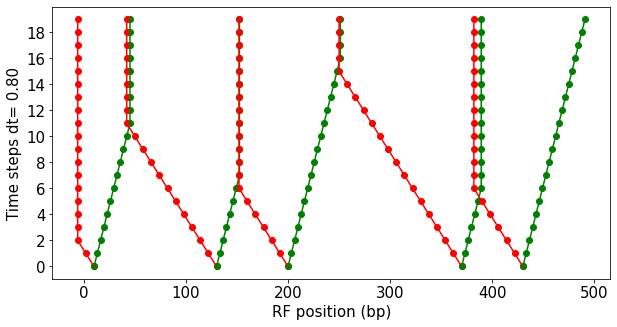

In [7]:
#sync_replication(DT,Time,Blocks)

#sync_replication(0.5,20,5)

T = 20
dt = 0.8
B = 5
VL = 10.0
VR = 4.0
plt.figure(figsize=(10,5)) 
#plt.suptitle('Asynchronous DNA Replication',fontsize = 15)
for i in range(1):
    #plt.subplot(2,2,i+1)
    #dt = np.random.choice(np.arange(0.2,0.9,0.1))
    #T = np.random.choice(np.arange(5,20,1))
    sync_replication(dt,T,B,VL,VR)
plt.show()


Ori_positions [ 70. 100. 290. 340. 400.]

Time step: 0

Time step: 1
Free Particles: 0
Particles:  {}
Merge time: {}

Time step: 2
Free Particles: 0
Particles:  {}
Merge time: {}

Time step: 3
Free Particles: 0
Particles:  {}
Merge time: {}

Time step: 4
Free Particles: 0
Particles:  {}
Merge time: {}

Time step: 5
Free Particles: 1.0
Particles:  {1: 1}
Merge time: {5: 1}

Time step: 6
Free Particles: 1.0
Particles:  {1: 1}
Merge time: {5: 1}

Time step: 7
Free Particles: 1.0
Particles:  {1: 1}
Merge time: {5: 1}

Time step: 8
Free Particles: 2.0
Particles:  {1: 1, 3: 1, 4: 1}
Merge time: {5: 1, 8: 1}

Time step: 9
Free Particles: 2.0
Particles:  {1: 1, 3: 1, 4: 1}
Merge time: {5: 1, 8: 1}

Time step: 10
Free Particles: 3.0
Particles:  {1: 1, 3: 1, 4: 1, 5: 1}
Merge time: {5: 1, 8: 1, 10: 1}

Time step: 11
Free Particles: 3.0
Particles:  {1: 1, 3: 1, 4: 1, 5: 1}
Merge time: {5: 1, 8: 1, 10: 1}

Time step: 12
Free Particles: 3.0
Particles:  {1: 1, 3: 1, 4: 1, 5: 1}
Merge time: {5: 1, 8:

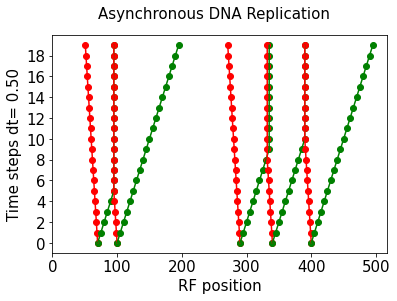

In [12]:
#sync_replication(DT,Time,Blocks)

#sync_replication(0.5,20,5)

T = 20
dt = 0.5
B = 5
VL = 2.0
VR = 10.0
#plt.figure(figsize=(10,5))   
#plt.figure(figsize=(10,10))   
plt.suptitle('Asynchronous DNA Replication',fontsize = 15)
for i in range(1):
    #plt.subplot(2,2,i+1)
    #dt = np.random.choice(np.arange(0.2,0.9,0.1))
    #T = np.random.choice(np.arange(5,20,1))
    sync_replication(dt,T,B,VL,VR)
plt.show()


## Stochastic case

In [13]:
#Stochastic case

def sync_rep_stoc(DT,T,n,VL,VR):
    #Parameters
    B = np.zeros([n,11]) # 1. Equal block size
    vl = VL # 3. Variable fork speed
    vr = VR
    v = 10.0
    c = [0,n*100] # 4. Boundary conditions
    # oris between 2nd and n-1 blocks
    #a_oris = [0,1,2] # 5. All blocks active
    a_oris = list(np.arange(n))
    #a_pos = [30,150,270] # Randomly activated block pos
    #a_pos = [30,120,270,330,450,590,610,730,880,990]
    #a_pos = [50,150,250,350,450,550,650,750,850,950]
    a_pos = np.zeros(n)
    ori_ori = np.zeros(n-1)
    for i in range(n):
        #Random assignment of ori within block.
        pos = np.random.choice(np.arange(0,100,10))
        a_pos[i] = pos+i*100
    for i in range(n-1):
        ori_ori[i] = a_pos[i+1]-a_pos[i]
    print('Ori_positions',a_pos)
    #print('Ori-Ori',ori_ori)

    pos = np.zeros([n,2]) # for left and right rf
    par = np.zeros([n,2]) # For particle and its half parts
    Pt = {}
    delta = np.ones([n,2])
    
    Mt = {}
    
    RF_pos_l = {}
    RF_pos_r = {}
    
    #dt = 0.1 # time steps
    dt = DT # Delta time step
    t = 0 # Initial time 
    Time = T
    Y = 1.0 # Gamma variable
    mu = v/Y # factor
    NF = 0
    FP = 0
    def position(t,td):
        global FP
        if(t>0): # Boundary condition
            for ori in a_oris:
                vl,vr = np.random.choice(np.arange(11),2)
                # Non erminal cases
                if(ori>0 and ori<n-1):
                    if(pos[ori][0]>pos[ori-1][1]):
                        pos[ori][0] = pos[ori][0]*delta[ori][0] - vl*dt
                    if(pos[ori][1]<pos[ori+1][0]):
                        pos[ori][1] = pos[ori][1]*delta[ori][1] + vr*dt
                    #Merging with left adjacent Case
                    if(np.abs(pos[ori][0]-pos[ori-1][1])<=dt*v and par[ori][0]==1):
                        #print('%d merged to %d'%(ori+1,ori))
                        pos[ori][0] = pos[ori][0]
                        par[ori][0] = 0
                        Pt[ori+1] = 1
                        Mt[t] = 1
                    #Merging with right adjacent Case
                    if(np.abs(pos[ori+1][0]-pos[ori][1])<=dt*v and par[ori][1]==1):
                        #print('%d merged to %d'%(ori+1,ori+2))
                        pos[ori][1] = pos[ori][1]
                        par[ori][1] = 0
                        Pt[ori+1] = 1
                        Mt[t] = 1
                #Terminal cases
                if(ori==0 or ori==n-1):
                    if(ori==0):
                        #Ori 0 on left side
                        if(pos[ori][0]<= 0 and par[ori][0]==1):
                            pos[ori][0] = pos[ori][0]
                            par[ori][0] = 0
                            Pt[ori+1] = 1 #'ori: '+str(ori)+'-'+ str(0.5)
                            Mt[t] = 0.5
                            #print('%d merged to Left'%(ori+1))
                        #Next adjacent RF condition
                        if(pos[ori][0]>0) :
                            pos[ori][0] = pos[ori][0]*delta[ori][0] - vl*dt
                        if (pos[ori][1]<pos[ori+1][0]):
                            pos[ori][1] = pos[ori][1]*delta[ori][1] + vr*dt
                        # Find adjacent fired origin, in this case ori 2 is adj for simplicity.
                        #if(pos[ori+1][0] - pos[ori][1]>0):
                        #    pos[ori][1] = pos[ori][1]*delta[ori][1] + mu*dt
                        
                        if(np.abs(pos[ori+1][0] - pos[ori][1])<=dt*v and par[ori][1]==1):
                            #print('%d merged to %d'%(ori+1,ori+2))
                            par[ori][1] = 0
                            par[ori+1][0] = 0
                            Pt[ori+1] = 1 
                            Mt[t] = 1
                            #Pt[t] = par[]
                        
                            
                    if(ori==n-1):
                        #Ori n on right side
                        if(pos[ori][1]>= (ori+1)*100 and par[ori][1]==1):
                            pos[ori][1] = pos[ori][1]
                            par[ori][1] = 0
                            Pt[ori+1] = 1
                            Mt[t] = 0.5
                            #print('%d merged to Right'%(ori+1))
                        if(pos[ori][1]<(ori+1)*100):
                            pos[ori][1] = pos[ori][1]*delta[ori][1] + vr*dt
                        if(pos[ori][0]>pos[ori-1][1]):
                            pos[ori][0] = pos[ori][0]*delta[ori][0] - vl*dt
                        
                        if(np.abs(pos[ori][0] - pos[ori-1][1])<=dt*v and par[ori][0]==1):
                            #print('%d merged to %d'%(ori+1,ori))
                            par[ori][0] = 0
                            par[ori-1][1] = 0
                            Pt[ori+1] = 1
                            Mt[t] = 1
                            
                
                #Update RF positions
                RF_pos_l[ori].append(pos[ori][0])
                RF_pos_r[ori].append(pos[ori][1])
            #Check particles
            FP = free_par(NF)
            #print('\nFree Particles:',FP)
            #print('Particles: ',Pt)
            #print('Merge time:',Mt)
                #Check for merging cases
                #parti = merging(ori)
        return pos

    def particle(a_pos):
        for x in a_oris:
            par[x] = 1,1

    def merging(ori):
        #Synchronous case
        if(pos[ori][0] <= ori*100):
            par[ori][0] = 0
            #delta[ori][0]=0
            #pos[ori][0]=pos[ori][0]
            #print('RL left of Block %d merged '%(ori+1))
        if(pos[ori][1]>=(ori+1)*100):
            par[ori][1] = 0
            #delta[ori][1]=0
            #pos[ori][0]=-10
            #print('RL right of Block %d merged '%(ori+1))
            
        if(ori>0 and ori<n):
            Pt[ori] = Pt[ori-1]
        return par[ori]


    def active_ori(a_pos):
        #a_pos = np.random.choice(np.arange(0,110,10),3)
        for x in a_oris:
            #New oris
            RF_pos_l[x] = []
            RF_pos_r[x] = []
            if(pos[x]==0,0):
                pos[x] = a_pos[x],a_pos[x]
                RF_pos_l[x].append(a_pos[x])
                RF_pos_r[x].append(a_pos[x])
        return 0
    
    def rf_plot():
        #plt.figure(figsize=(10,10))
        for i in range(n):
            plt.plot(RF_pos_l[i],np.arange(len(RF_pos_l[i])),'r')
            plt.plot(RF_pos_r[i],np.arange(len(RF_pos_r[i])),'g')
            plt.scatter(RF_pos_l[i],np.arange(len(RF_pos_l[i])),c='r')
            plt.scatter(RF_pos_r[i],np.arange(len(RF_pos_r[i])),c='g')
        plt.xlabel('RF position (bp)',fontsize = 15)
        plt.ylabel('Time steps dt= %0.2f'%DT,fontsize = 15)
        #plt.title('Rule based Implementation',fontsize = 15)
        plt.xticks(np.arange(0,n*100+10,100),fontsize = 15)
        plt.yticks(np.arange(0,Time,2),fontsize = 15)
        #plt.show()
            
    def free_par(NF):
        #global NF
        for x in a_oris:
            if(par[x][0]==0):
                NF+=0.5
            if(par[x][1]==0):
                NF+=0.5
            #Pt[x] = Pt
        #merging_time.append(t)
        return NF
        #print(par)
    
    def print_par():
        print(par)
    
    
    active_ori(a_pos)
    particle(a_pos)
    while(t<Time):
    #    for ori in a_oris:
        #print('\nTime step:',t)
        xp = position(t,20)
        #print('RF\n',xp)
        t+=1
    #print('Free particles:',NF)
    rf_plot()
    
    #print_par()

Ori_positions [ 50. 170. 220. 320. 490.]


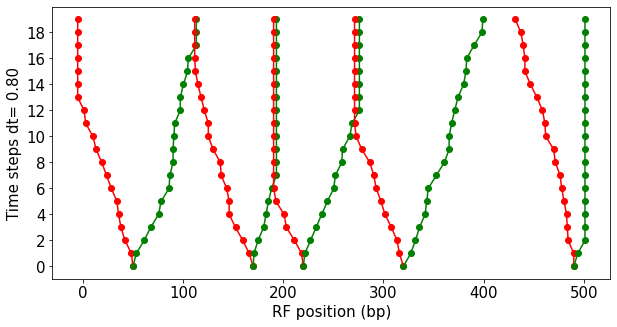

In [15]:
#sync_replication(DT,Time,Blocks)

#sync_replication(0.5,20,5)

T = 20
dt = 0.8
B = 5
VL = 2.0
VR = 20.0
plt.figure(figsize=(10,5))
#plt.suptitle('Asynchronous DNA Replication',fontsize = 15)
for i in range(1):
    #plt.subplot(2,2,i+1)
    #dt = np.random.choice(np.arange(0.2,1.0,0.1))
    #T = np.random.choice(np.arange(5,20,1))
    #VL,VR = np.random.choice(np.arange(2,10,1),2)
    sync_rep_stoc(dt,T,B,VL,VR)
plt.show()